# Demonstration of Oversampling Scaling

When we increase oversampling for the NUFFT, we increase the grid size but the number of non-cartesian samples remains fixed. This effectively adds a lot of zeros to the grid, but does not increase the total "energy" on the grid. This is problematic because the FFT is scaled by `sqrt(nvox)`, and `nvox` will increase as the over-sampling increases, leading to reduced image intensity.

To balance this, we introduce an additional scaling factor of `sqrt(os ^ D)` where `os` is the oversampling factor and `D` is the number of NUFFT dimensions (2 or 3). As can be seen below, this leads to the same output image intensity regardless of oversampling.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import riesling as rl
prefix='oversamp'
!rm {prefix}*.h5

Create a phantom...

In [2]:
mat = 80
snr = 50
nchan = 4
recon = f'--sdc={prefix}-sdc.h5 --kernel=KB3'
!riesling phantom {prefix} --shepp_logan --matrix={mat} --snr={snr} --channels={nchan} --os=3.0 --kernel=NN
!riesling sdc --sdc=pipenn {prefix}.h5

Reconstruct with different oversampling factors but the same kernel. NN leads to increased intensity differences. Display the differences between the over-samplings. There is some residual difference between 1.3 and 2.0 oversampling, but between 2.0 and 3.0 the difference is tiny.

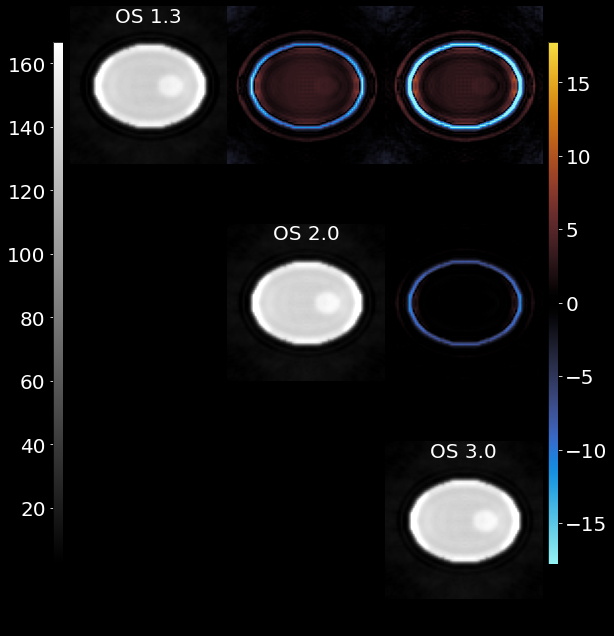

In [3]:
kernel='KB3'
!riesling recon {recon} --kernel={kernel} {prefix}.h5 -o {prefix}-os13 --os=1.3
!riesling recon {recon} --kernel={kernel} {prefix}.h5 -o {prefix}-os20 --os=2.0
!riesling recon {recon} --kernel={kernel} {prefix}.h5 -o {prefix}-os30 --os=3.0
rl.images.diffN([f'{prefix}-os13-recon.h5',f'{prefix}-os20-recon.h5',f'{prefix}-os30-recon.h5'],
    titles=['OS 1.3', 'OS 2.0', 'OS 3.0'])